In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot

In [2]:
df =pd.read_csv('CTG_Stock_Data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/27/2014,11717867188,11856540039,11648531250,11717867188,11717867188,608510
1,2/6/2014,11648531250,11717867188,11509858398,11648531250,11648531250,1140509
2,2/7/2014,11579194336,11717867188,11509858398,11579194336,11579194336,826750
3,2/10/2014,11509858398,11648531250,11440521484,11509858398,11509858398,1639712
4,2/11/2014,11579194336,11717867188,11440521484,11509858398,11509858398,2082063
...,...,...,...,...,...,...,...
2460,12/8/2023,27000000000,27100000000,26700000000,26900000000,26900000000,4518900
2461,12/11/2023,26950000000,27050000000,26700000000,26850000000,26850000000,2323100
2462,12/12/2023,26900000000,27000000000,26700000000,27000000000,27000000000,3346200
2463,12/13/2023,27150000000,27350000000,26700000000,26750000000,26750000000,3749800


In [3]:
data = df['Close'][::-1];
val= data.reset_index(drop=True);
val

0       26750000000
1       26750000000
2       27000000000
3       26850000000
4       26900000000
           ...     
2460    11509858398
2461    11509858398
2462    11579194336
2463    11648531250
2464    11717867188
Name: Close, Length: 2465, dtype: int64

In [4]:
# Create a date range starting from a specific date
start_date = '1/27/2014'
stop_date = '12/14/2023'
dates = pd.date_range(start=start_date, periods=len(val),freq='D')

In [6]:
# 2.  chia train test theo tỉ lệ 9-1
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.9* len(df))
test_size = int(0.1* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [7]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=94438.115, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=94436.816, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=94436.626, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=94436.652, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=94435.225, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=94434.686, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=94440.548, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=94440.455, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=94438.584, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=94438.539, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=94433.016, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=94435.106, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=94435.079, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=94438.991, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [9]:
#Train all data to predict next 30 days.

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[2.46448011e+10 2.46545431e+10 2.46453450e+10 2.46540297e+10
 2.46458298e+10 2.46535719e+10 2.46462620e+10 2.46531638e+10
 2.46466473e+10 2.46528000e+10 2.46469908e+10 2.46524757e+10
 2.46472970e+10 2.46521866e+10 2.46475699e+10 2.46519289e+10
 2.46478133e+10 2.46516991e+10 2.46480302e+10 2.46514943e+10
 2.46482236e+10 2.46513117e+10 2.46483960e+10 2.46511490e+10
 2.46485497e+10 2.46510039e+10 2.46486867e+10 2.46508745e+10
 2.46488088e+10 2.46507592e+10]


Testing RMSE: 2083033492.2182748
Testing MAPE: 0.06403169848099971
Testing MSLE: 0.006342852383398537


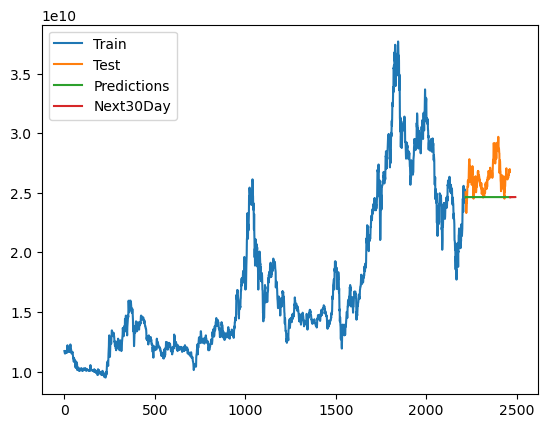

In [11]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error

# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# Calculate MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()